In [12]:
import pandas as pd
from qolmat.benchmark import comparator, missing_patterns
from qolmat.imputations import imputers

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("../data/train.csv")

In [18]:
df

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0
2,2020-01-01 02,29.3,NaN,5.1,51.0,44.9
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6
...,...,...,...,...,...,...
40986,2024-09-03 18,NaN,0.222,55.1,12.0,5.3
40987,2024-09-03 19,NaN,0.245,48.2,13.4,7.0
40988,2024-09-03 20,NaN,0.234,44.5,12.4,7.1
40989,2024-09-03 21,NaN,0.225,25.9,10.6,5.4


In [19]:
df.set_index("id", inplace=True)

In [22]:
df.index = pd.to_datetime(df.index)

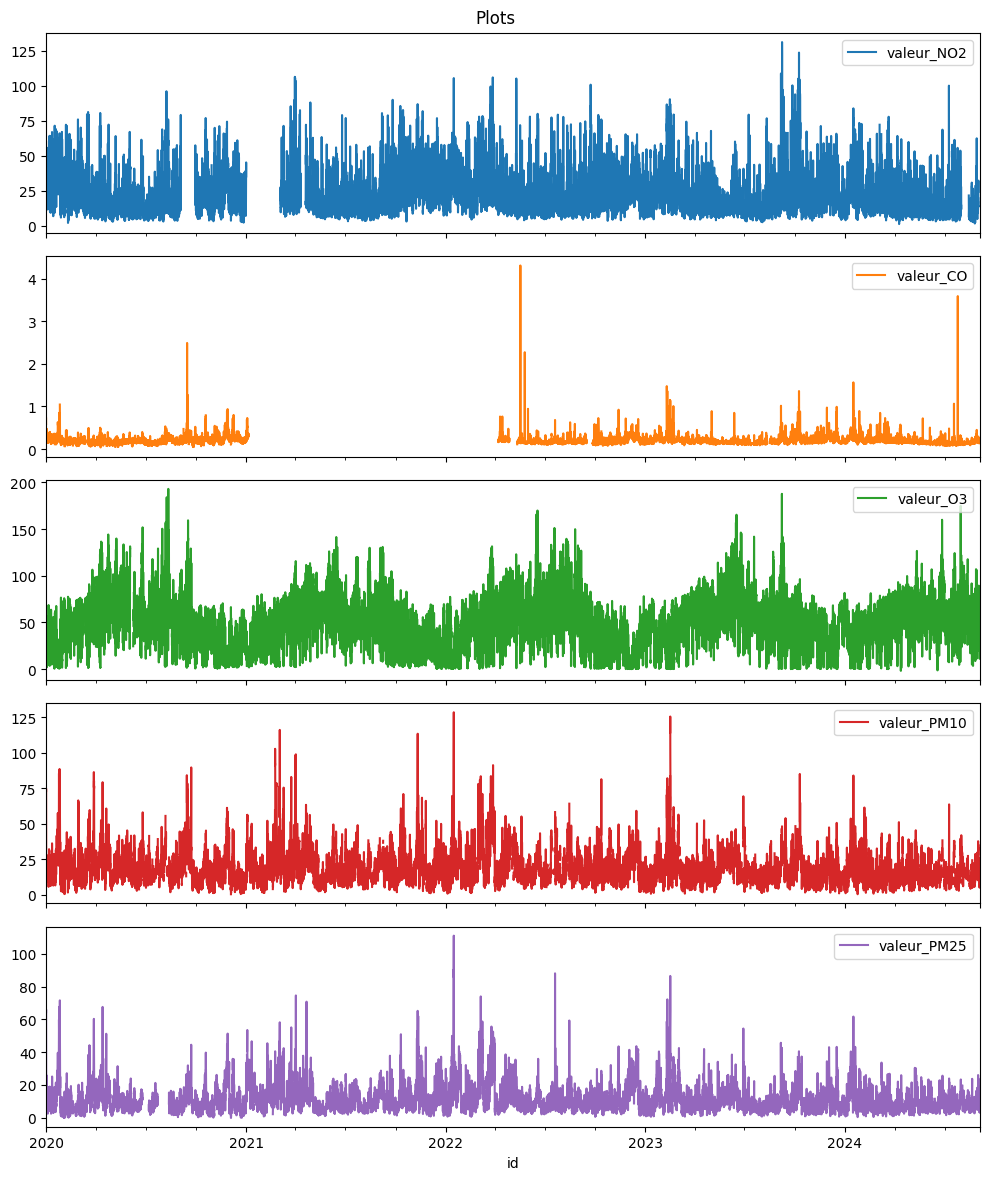

In [24]:
# Plotting the various columns in the dataframe
df.plot(subplots=True, figsize=(10, 12), title="Plots")
plt.tight_layout()
plt.show()

In [25]:
df_o3 = df[["valeur_O3"]]

In [26]:
df_o3

,valeur_O3
id,
2020-01-01 00:00:00,15.7
2020-01-01 01:00:00,10.1
2020-01-01 02:00:00,5.1
2020-01-01 03:00:00,7.2
2020-01-01 04:00:00,8.3
...,...
2024-09-03 18:00:00,55.1
2024-09-03 19:00:00,48.2
2024-09-03 20:00:00,44.5


In [29]:
df_o3.sort_index(inplace=True)

In [31]:
df_o3_test = df_o3.iloc[40000:]

In [34]:
df_o3_train = df_o3.iloc[:40000]

In [36]:
import prophet

15:59:53 - cmdstanpy - INFO - Chain [1] start processing
16:00:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ameya\miniconda3\envs\air\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


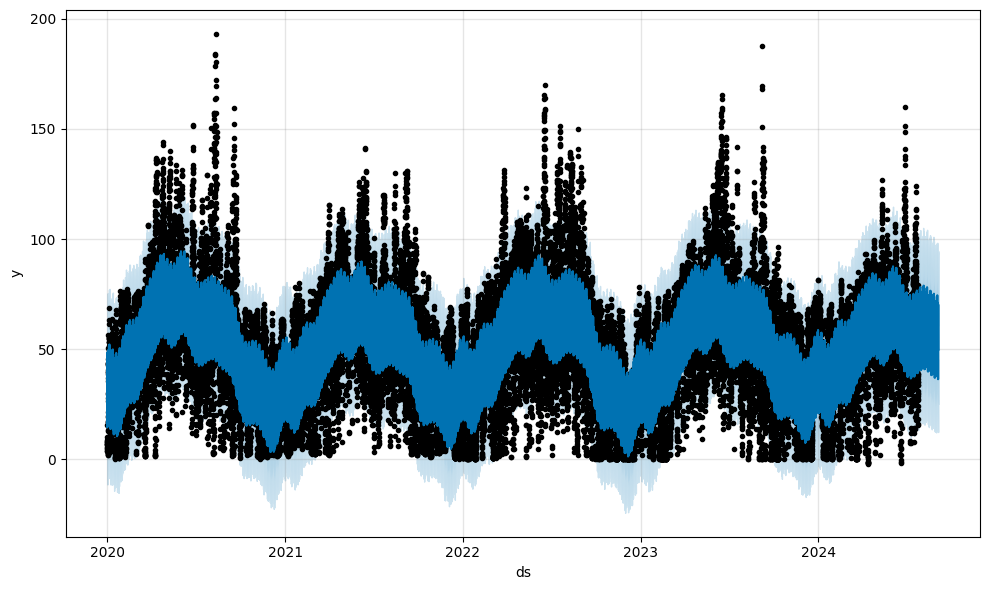

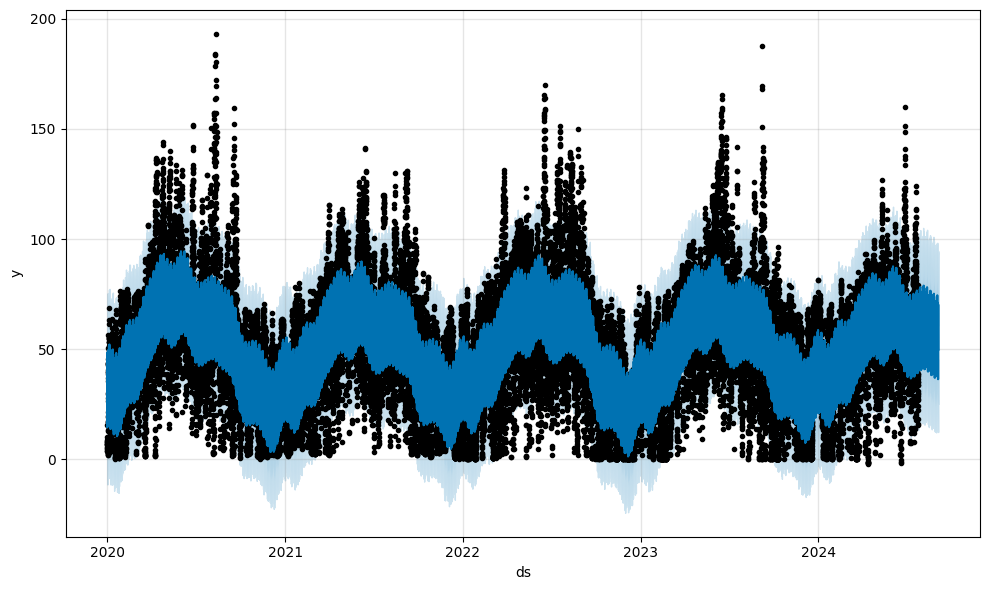

In [38]:
prophet_model = prophet.Prophet()

prophet_model.fit(
    df_o3_train.reset_index().rename(columns={"id": "ds", "valeur_O3": "y"})
)

future = prophet_model.make_future_dataframe(periods=len(df_o3_test), freq="H")

forecast = prophet_model.predict(future)

prophet_model.plot(forecast)

<Axes: xlabel='ds'>

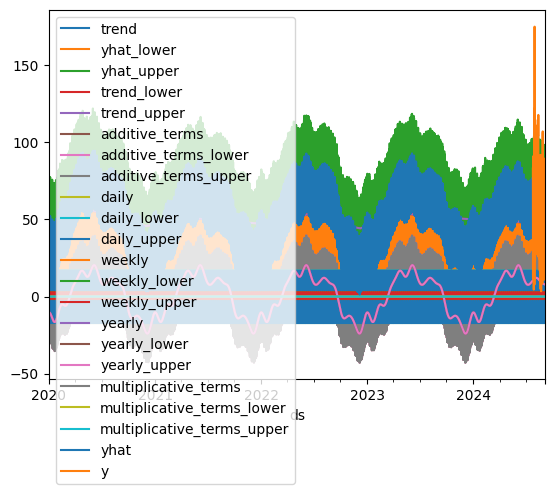

In [39]:
# Forecast vs Actual

forecast.set_index("ds", inplace=True)

forecast["y"] = df_o3_test
forecast.plot()


In [41]:
# MAE
from sklearn.metrics import mean_absolute_error

mean_absolute_error(forecast["y"], forecast["yhat"])

print("MAE: ", mean_absolute_error(forecast["y"], forecast["yhat"]))

ValueError: Input contains NaN.

In [44]:
df_o3_test.dropna(inplace=True)

C:\Users\ameya\AppData\Local\Temp\ipykernel_5404\948602723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o3_test.dropna(inplace=True)


c:\Users\ameya\miniconda3\envs\air\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


ValueError: Input contains NaN.

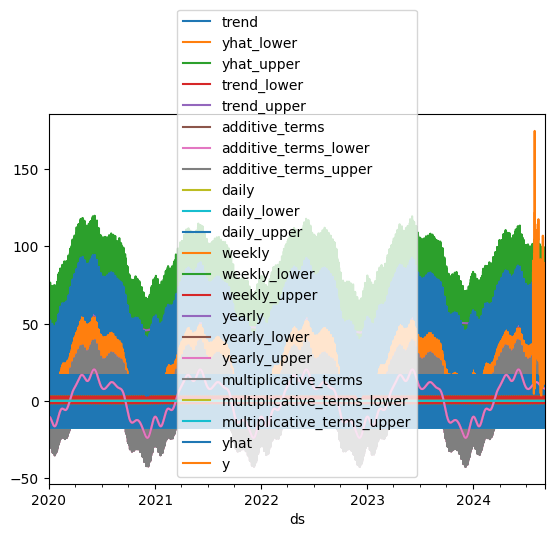

In [45]:
future = prophet_model.make_future_dataframe(periods=len(df_o3_test), freq="H")

forecast = prophet_model.predict(future)

forecast.set_index("ds", inplace=True)

forecast["y"] = df_o3_test

forecast.plot()

print("MAE: ", mean_absolute_error(forecast["y"], forecast["yhat"]))

In [47]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40984 entries, 2020-01-01 00:00:00 to 2024-09-03 15:00:00
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trend                       40984 non-null  float64
 1   yhat_lower                  40984 non-null  float64
 2   yhat_upper                  40984 non-null  float64
 3   trend_lower                 40984 non-null  float64
 4   trend_upper                 40984 non-null  float64
 5   additive_terms              40984 non-null  float64
 6   additive_terms_lower        40984 non-null  float64
 7   additive_terms_upper        40984 non-null  float64
 8   daily                       40984 non-null  float64
 9   daily_lower                 40984 non-null  float64
 10  daily_upper                 40984 non-null  float64
 11  weekly                      40984 non-null  float64
 12  weekly_lower                40984 non-null  float64
 

MAE:  14.133904117977826


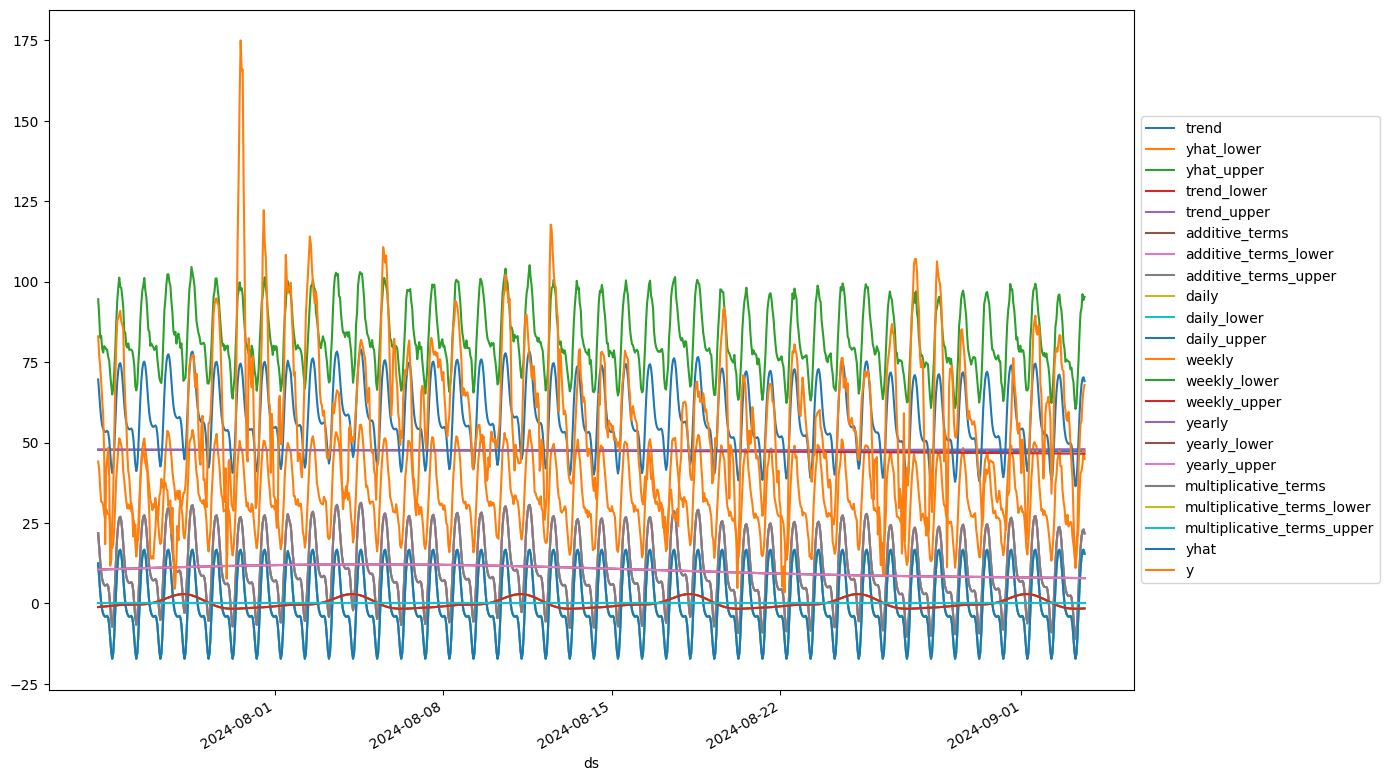

In [51]:
# Drop NaN values from the forecast DataFrame
filtered_forecast = forecast.dropna(subset=["y", "yhat"])

# Calculate MAE on the filtered DataFrame
mae = mean_absolute_error(filtered_forecast["y"], filtered_forecast["yhat"])

print("MAE: ", mae)


# Plot the filtered results with a larger figure size
ax = filtered_forecast.plot(figsize=(14, 10))  # Adjust to your desired size

# Optionally, improve layout by moving the legend outside the plot
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


In [54]:
forecast


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
ds,,,,,,,,,,,,,,,,,,,,,
2024-07-24 16:00:00,47.750491,44.096647,94.515061,47.750491,47.750491,21.833150,21.833150,21.833150,12.423722,12.423722,...,-1.114017,-1.114017,10.523445,10.523445,10.523445,0.0,0.0,0.0,69.583641,83.0
2024-07-24 17:00:00,47.750030,41.758188,89.570114,47.750030,47.750030,17.614377,17.614377,17.614377,8.171529,8.171529,...,-1.090726,-1.090726,10.533573,10.533573,10.533573,0.0,0.0,0.0,65.364406,77.1
2024-07-24 18:00:00,47.749569,36.047215,82.614637,47.749569,47.749569,13.226315,13.226315,13.226315,3.748768,3.748768,...,-1.066142,-1.066142,10.543689,10.543689,10.543689,0.0,0.0,0.0,60.975884,73.7
2024-07-24 19:00:00,47.749107,31.629575,83.103133,47.749107,47.749107,9.735414,9.735414,9.735414,0.221892,0.221892,...,-1.040269,-1.040269,10.553791,10.553791,10.553791,0.0,0.0,0.0,57.484521,68.9
2024-07-24 20:00:00,47.748646,31.456359,79.117065,47.748646,47.748646,7.554550,7.554550,7.554550,-1.996191,-1.996191,...,-1.013138,-1.013138,10.563879,10.563879,10.563879,0.0,0.0,0.0,55.303196,63.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03 11:00:00,47.299075,40.408473,90.176391,46.520915,47.916986,17.041721,17.041721,17.041721,10.763152,10.763152,...,-1.606764,-1.606764,7.885333,7.885333,7.885333,0.0,0.0,0.0,64.340796,55.8
2024-09-03 12:00:00,47.298614,41.173000,91.797862,46.517782,47.917504,20.692808,20.692808,20.692808,14.404213,14.404213,...,-1.592437,-1.592437,7.881031,7.881031,7.881031,0.0,0.0,0.0,67.991421,56.7
2024-09-03 13:00:00,47.298153,43.244367,96.094948,46.514650,47.919733,22.591717,22.591717,22.591717,16.291636,16.291636,...,-1.576618,-1.576618,7.876698,7.876698,7.876698,0.0,0.0,0.0,69.889870,63.0


In [53]:
forecast.dropna(inplace=True)

<Axes: xlabel='ds'>

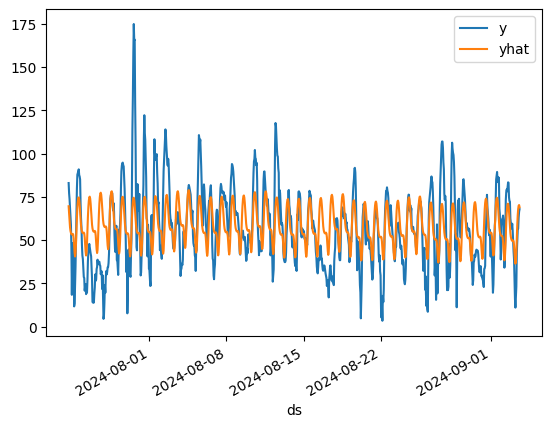

In [57]:
forecast[["y", "yhat"]].plot()